# Stochastic processes course 2018/2019-2 @ ELTE
# Assignment 4: Random-walk simulation with Monte Carlo method
## 03.11.2019

## Random-Walk on a 1D lattice with equilibrium:

Initially a particle rests on a 1D lattice with lattice constant $a$ in one of its grid points. It is also attached with a rubber rope with $D$ spring constant to the $x=0$ point. In every step, the particle moves in the positive, or negative direction, always jumping between discrete, adjacent lattice points. This means that at each step it will jump to one of the grid points adjacent to its current position.   
In every step, we calculate the difference of the potential energy between the origin and the end point of a single jump. If $\Delta E < 0$, then we execute the step in the simulation. If $\Delta E > 0$, we choose a random value $X$, where $X \in \left[ 0; 1 \right]$. If $X < e^{- \beta \Delta E}$ we also execute the step, else we do nothing, leave the particle unmoved and continue with the next step in the simulation.
    
Characteristic parameters of the system (for me):

$$
\beta D a^{2} = \frac{D a^{2}}{k_{B} T} = \left\{ 0.06,\ 0.24,\ 0.52,\ 1.35 \right\}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import random
import seaborn as sns

sns.set_style(style='whitegrid')

## Characteristic parameters of the system

In [601]:
# Boltzmann constant
k_B = 1.380648 * 10**(-23)

# Arbitrary spring constant of the rubber band, fixing the moving particle
D = 1e-03

# Arbitrary lattice constant of the grid
# Distance between discrete points in the 1D lattice
# a = 5 * 1e-10 approximatly corresponds to real materials
a = 5 * 1e-10

beta_1 = 0.06 / (D * a**2)
print('At first case T = {0} K'.format(1 / (beta_1 * k_B)))
beta_2 = 0.24 / (D * a**2)
print('At second case T = {0} K'.format(1 / (beta_2 * k_B)))
beta_3 = 0.52 / (D * a**2)
print('At third case T = {0} K'.format(1 / (beta_3 * k_B)))
beta_4 = 1.35 / (D * a**2)
print('At fourth case T = {0} K'.format(1 / (beta_4 * k_B)))

At first case T = 301.7906567544129 K
At second case T = 75.44766418860323 K
At third case T = 34.821998856278405 K
At fourth case T = 13.412918077973904 K


## 1.: Choose direction for the 1D random-walk on the X-axis

In [238]:
def choose_sign():
    return -1 if random.random() < 0.5 else 1

### Testing sign choosing function
### Means of random +1 and -1 values have an expected value of 0

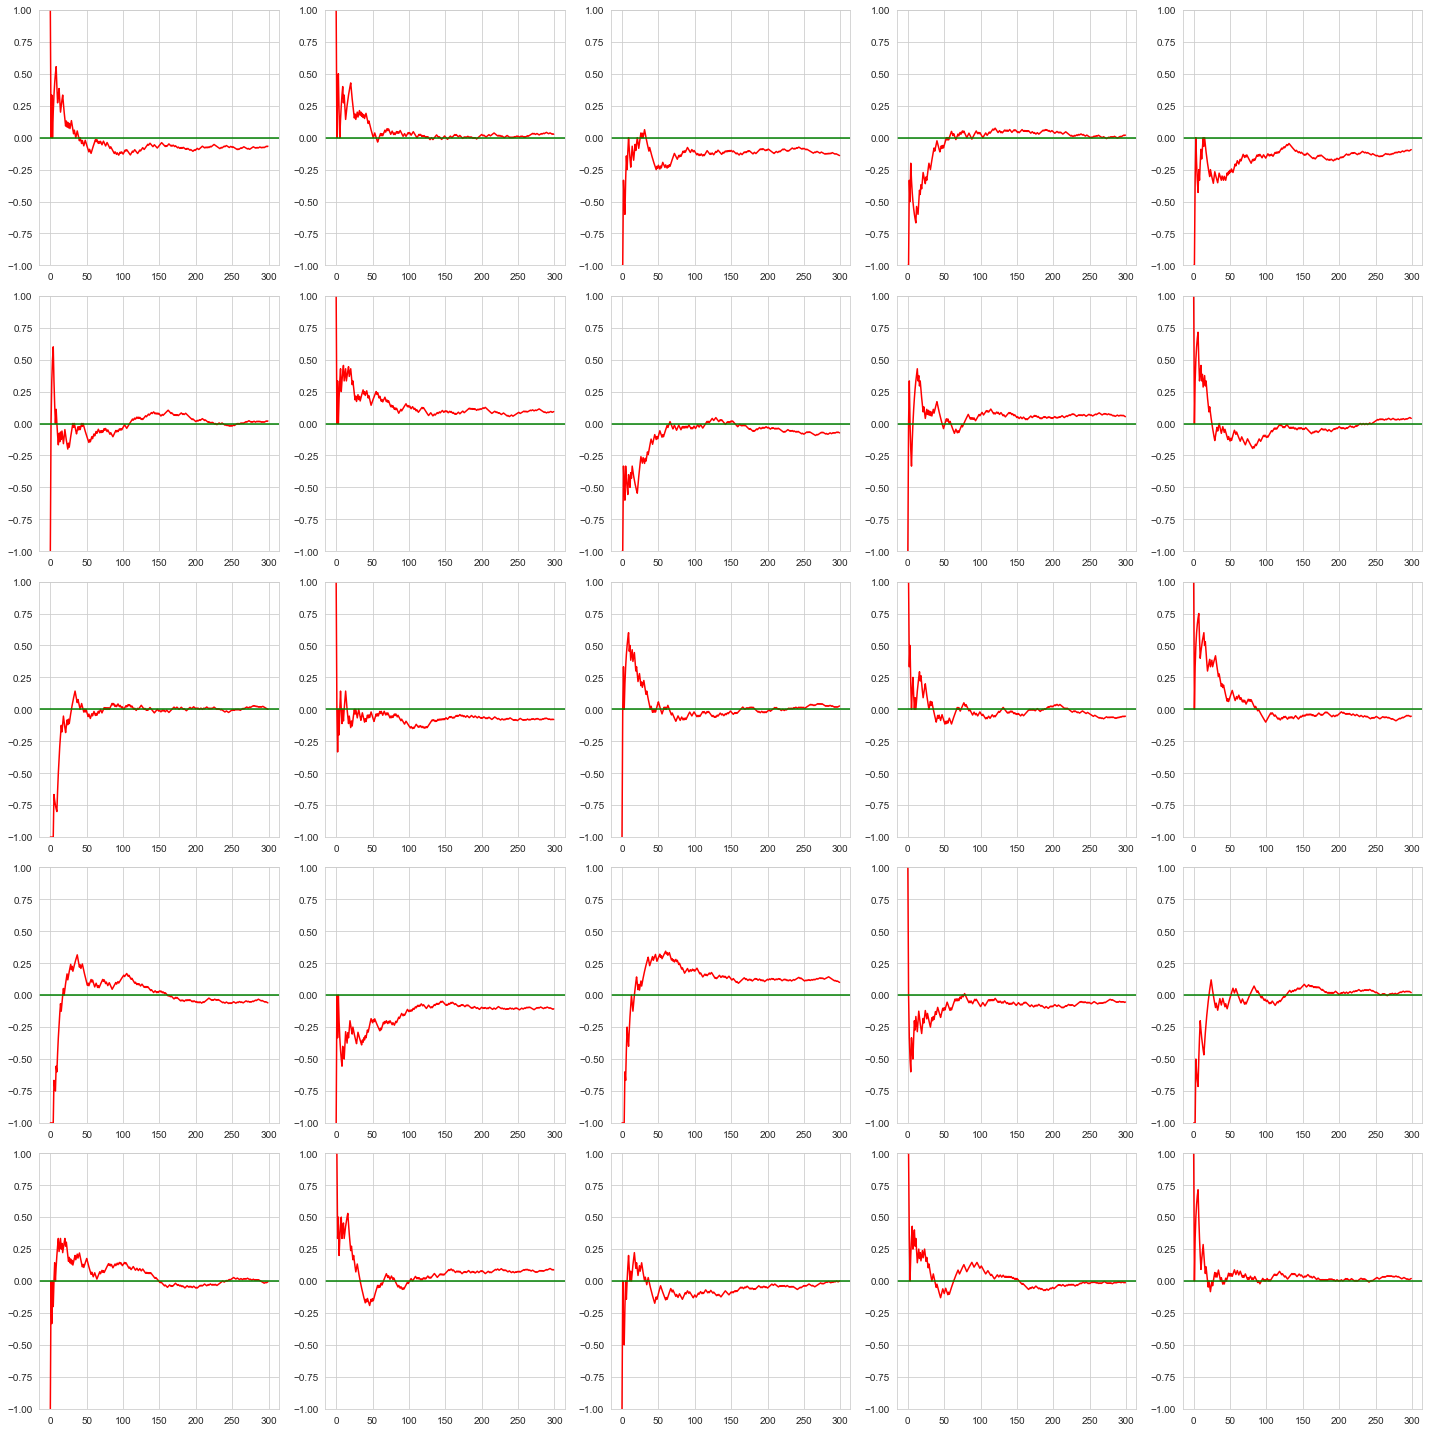

In [424]:
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

n = 300

for k in range(0,nrows):
    for j in range(0,ncols):
        indeces = [i for i in range(0,n)]
        randoms = [choose_sign() for i in range(0,n)]
        means = [np.mean(randoms[:(i+1)]) for i in range(0,n)]

        axes[j][k].plot(indeces, means, c='red')
        
        axes[j][k].set_ylim(-1,1)
        
        axes[j][k].axhline(y=0, color='green')

fig.tight_layout()
plt.show()

## 2.: $E_{n}$ energy of the current energy level

In [320]:
def E(energy_level, a, D):
    return 1/2 * D * a**2 * energy_level**2

## 3.: Step with the simulation

In [567]:
def simulation_step(beta, start, steps):

    # Chronologies for reached energy levels' indeces and actual energies in order
    energy_levels_chronology = np.zeros((steps+1), dtype='int')
    energy_chronology = np.zeros((steps+1))
    # Starting position on X axis
    energy_levels_chronology[0] = start
    energy_chronology[0] = E(energy_level = energy_levels_chronology[0],
                             a = a,
                             D = D)

    for current_step in range(0,steps):
        # Choose a direction for the 1D random-walk on the X-axis
        # +1 return value indicates stepping in the positive (right) direction
        # -1 return value indicates steping in the negative (left) direction
        direction = choose_sign()

        # Calculate energy difference between the jump's origin and end points
        E_1 = E(energy_level = energy_levels_chronology[current_step],
                a = a,
                D = D)

        E_2 = E(energy_level = energy_levels_chronology[current_step] + direction * 1,
                a = a,
                D = D)
        
        delta_E = E_2 - E_1

        # Update chronology of reached energy levels' indeces
        # If delta_E <= 0, then execute the step
        if(delta_E <= 0):
            energy_levels_chronology[current_step+1] = energy_levels_chronology[current_step] + direction * 1

        # If delta_E > 0, choose a random number X, between 0 and 1
        # If X < e^(-beta * delta_E), then execute the step
        # If not, then leave the particle at its current place and continue with the next step
        else:
            if(random.random() < np.exp(- beta * delta_E)):
                energy_levels_chronology[current_step+1] = energy_levels_chronology[current_step] + direction * 1
            else:
                energy_levels_chronology[current_step+1] = energy_levels_chronology[current_step]

        # Update chronology of actual reached energy levels
        energy_chronology[current_step+1] = E(energy_level = energy_levels_chronology[current_step+1],
                                              a = a,
                                              D = D)
                
    return energy_levels_chronology, energy_chronology

## Run functions with arbitrary initial conditons

In [570]:
steps = 10000
start = -250

betas = {'1': beta_1,
         '2': beta_2,
         '3': beta_3,
         '4': beta_4
        }

# Dicts for storing the energy levels' indeces and actual energies for various betas
energy_levels_chronology = {}
energy_chronology = {}

# Run the simulation
for i in range(0,len(betas)):
    energy_levels_chronology[str(i+1)], energy_chronology[str(i+1)] = simulation_step(beta=betas[str(i+1)],
                                                                                      start=start,
                                                                                      steps=steps)

step_indeces = np.asarray([i for i in range(0,steps+1)])

## Plotting propagation of the particle throughout energy levels

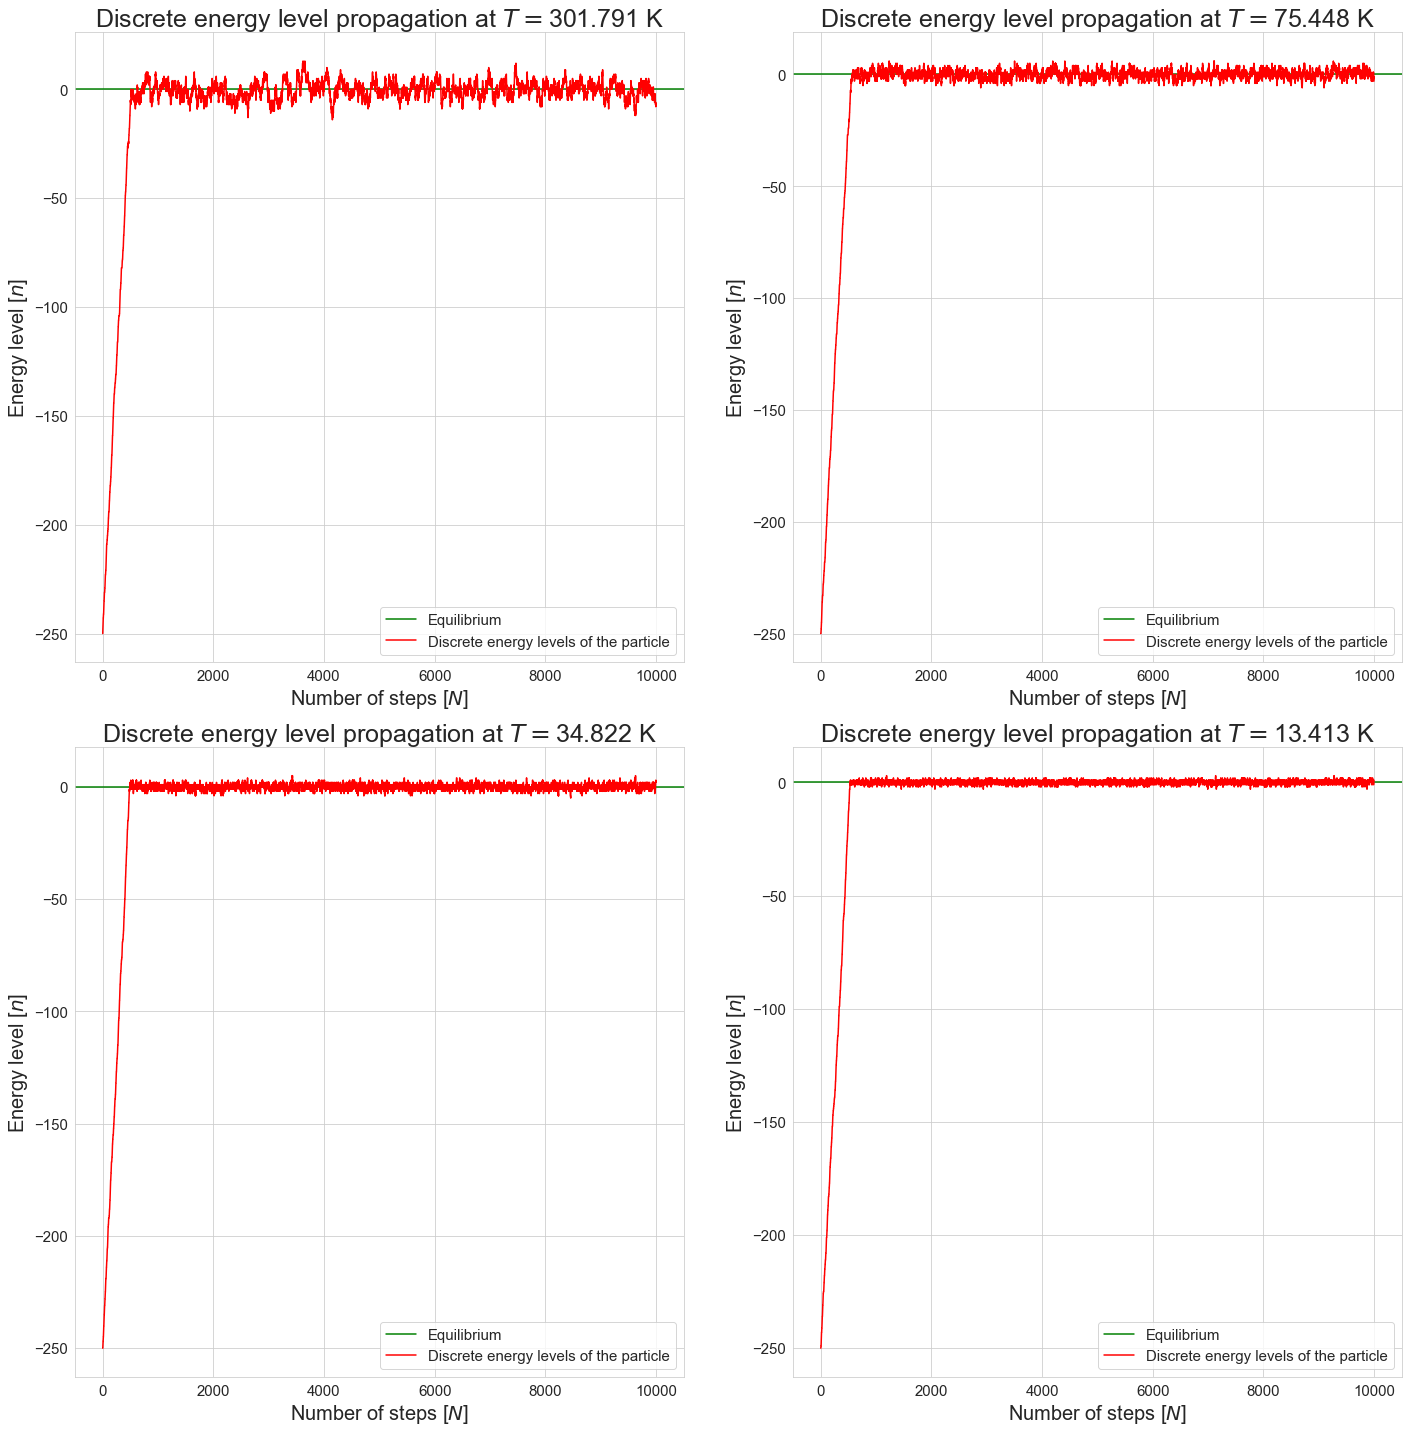

In [614]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

for i in range(0,nrows):
    for j in range(0,ncols):
        
        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        axes[i][j].plot(step_indeces, energy_levels_chronology[str(i*nrows + j + 1)], c='red', label='Discrete energy levels of the particle')

        axes[i][j].set_title('Discrete energy level propagation at $T =${0:.3f} K'.format(1 / (betas[str(i*nrows + j + 1)] * k_B)), fontsize=50/ncols)

        axes[i][j].set_xlabel('Number of steps [$N$]', fontsize=40/ncols)
        axes[i][j].set_ylabel('Energy level [$n$]', fontsize=40/ncols)

        axes[i][j].tick_params(axis='both', which='major', labelsize=30/ncols)

        axes[i][j].legend(fontsize=30/ncols)

fig.tight_layout()
plt.show()

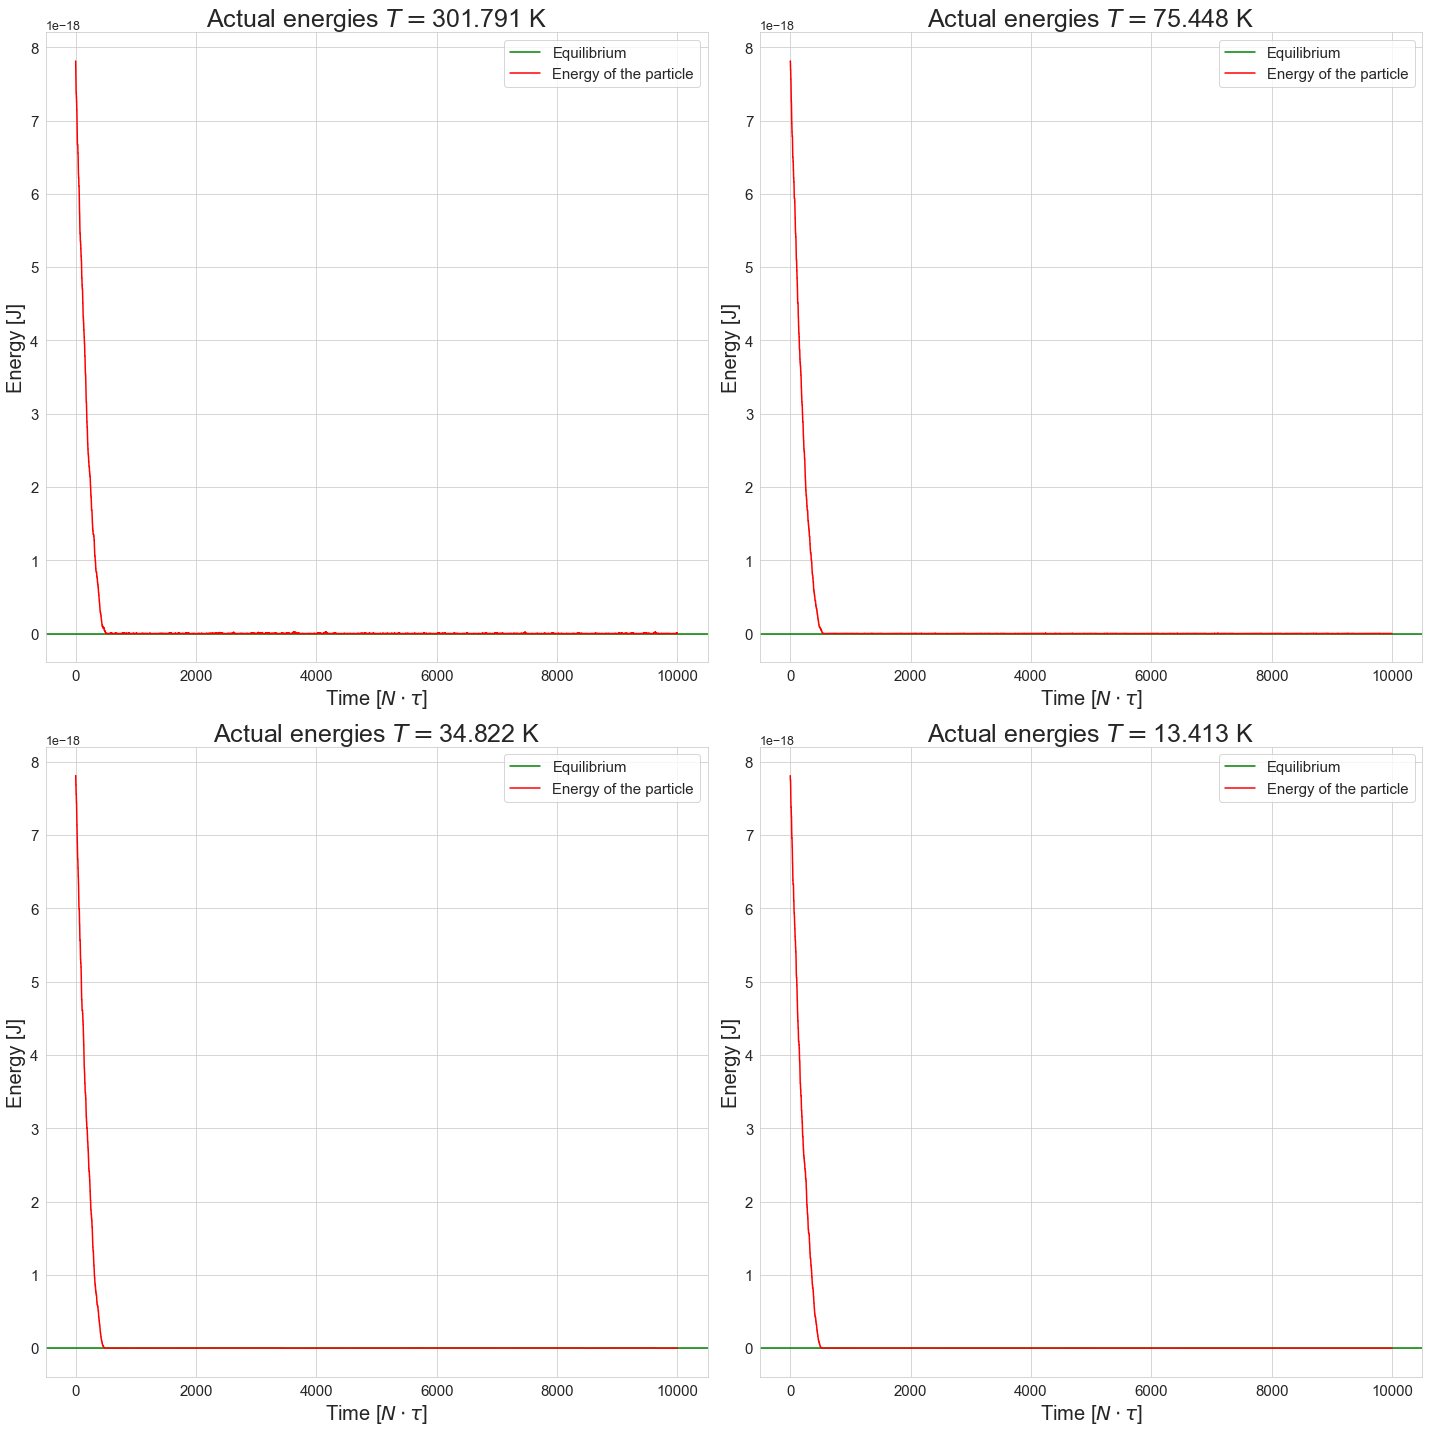

In [615]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

for i in range(0,nrows):
    for j in range(0,ncols):

        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        axes[i][j].plot(step_indeces, energy_chronology[str(i*nrows + j + 1)], c='red', label='Energy of the particle')

        axes[i][j].set_title('Actual energies $T =${0:.3f} K'.format(1 / (betas[str(i*nrows + j + 1)] * k_B)), fontsize=50/ncols)

        axes[i][j].set_xlabel('Time [$N \\cdot \\tau$]', fontsize=40/ncols)
        axes[i][j].set_ylabel('Energy [J]', fontsize=40/ncols)

        axes[i][j].tick_params(axis='both', which='major', labelsize=30/ncols)
        axes[i][j].yaxis.get_offset_text().set_fontsize(25/ncols)

        axes[i][j].legend(fontsize=30/ncols)
fig.tight_layout()
plt.show()

## Test various initial conditions for one choosen $T$ temperature

### The choosen $T$ will be here $T = \frac{1}{\beta_{1} k_{B}} = 301.791\ \text{K}$

In [556]:
steps = 10000
choosen_beta = beta_1

# Dicts for storing the energy levels' indeces and actual energies for various betas
energy_levels_chronology_fixedT = {}
energy_chronology_fixedT = {}

# Run the simulation
for i in range(0,25):
    start = -250 + i * 20
    energy_levels_chronology_fixedT[str(i+1)], energy_chronology_fixedT[str(i+1)] = simulation_step(beta=choosen_beta,
                                                                                                    start=start,
                                                                                                    steps=steps)

step_indeces = np.asarray([i for i in range(0,steps+1)])

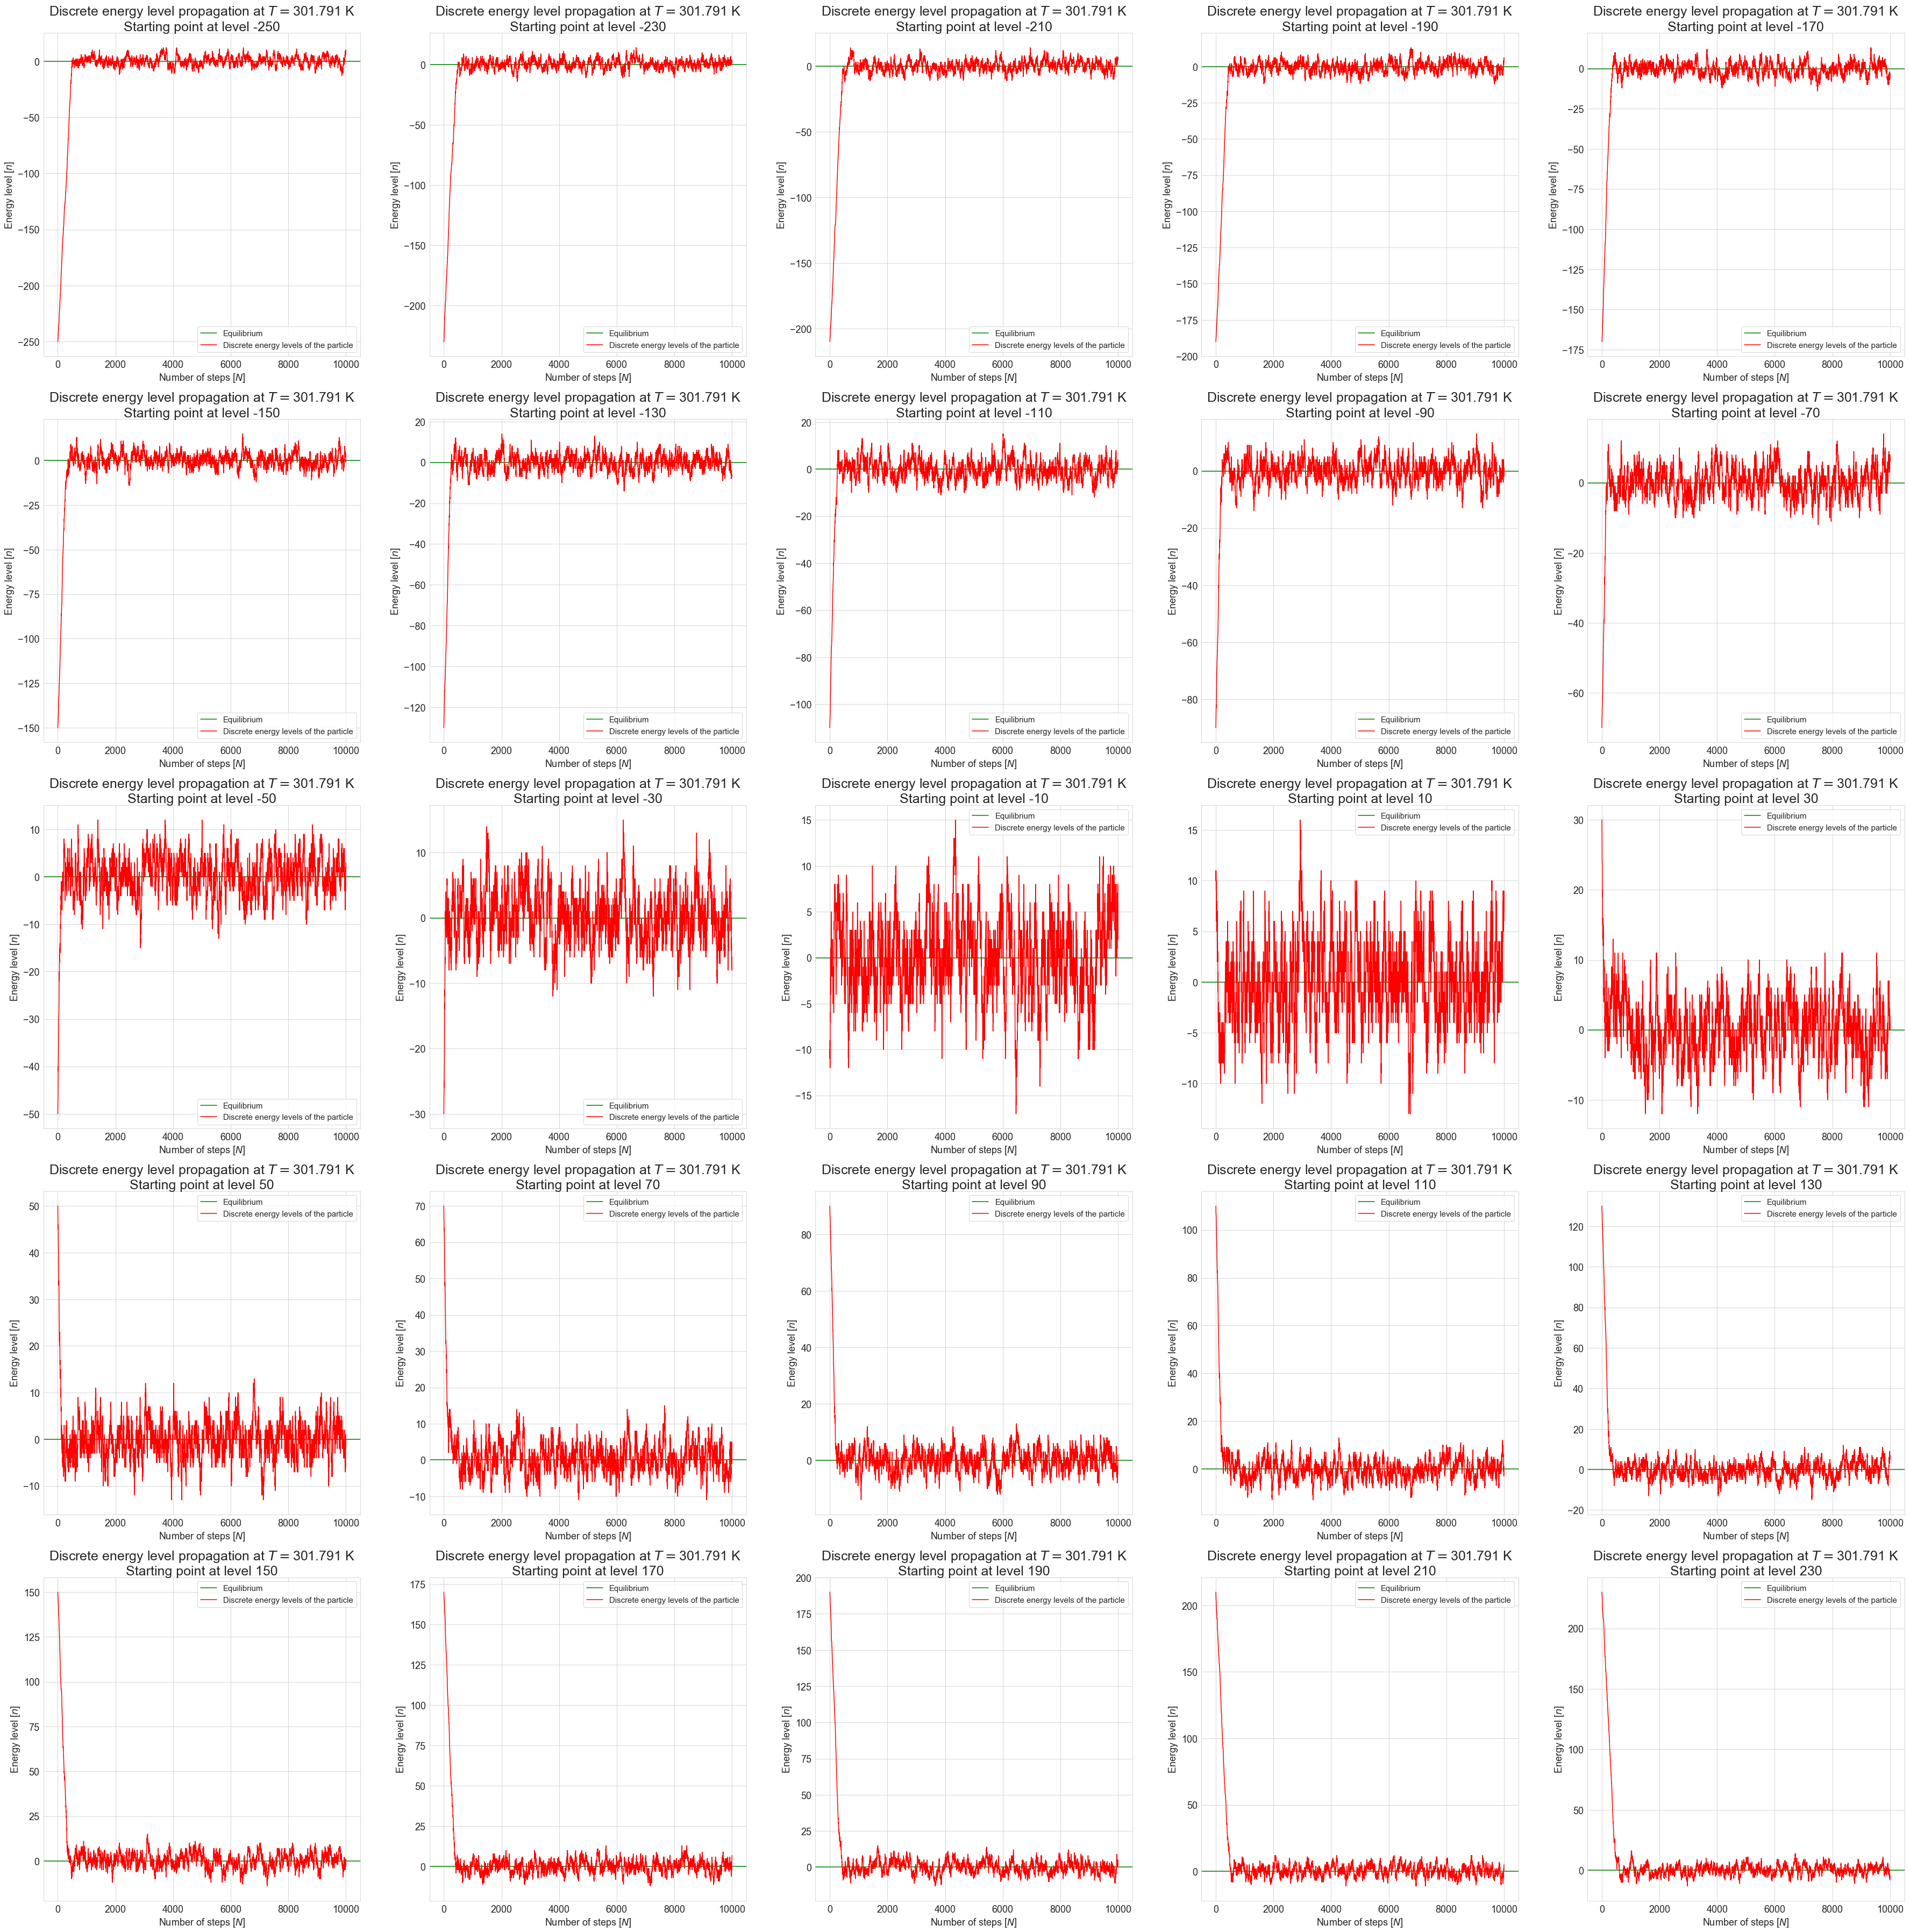

In [621]:
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(50,50))

titlesize=25
axislabelsize=18

for i in range(0,nrows):
    for j in range(0,ncols):
        
        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        axes[i][j].plot(step_indeces, energy_levels_chronology_fixedT[str(i*nrows + j + 1)], c='red', label='Discrete energy levels of the particle')

        axes[i][j].set_title('Discrete energy level propagation at $T =${0:.3f} K\nStarting point at level {1}'.format(1 / (choosen_beta * k_B),
                                                                                                                       -250 + (i*nrows + j) * 20),
                             fontsize=titlesize)

        axes[i][j].set_xlabel('Number of steps [$N$]', fontsize=axislabelsize)
        axes[i][j].set_ylabel('Energy level [$n$]', fontsize=axislabelsize)

        axes[i][j].tick_params(axis='both', which='major', labelsize=18)

        axes[i][j].legend(fontsize=15)

fig.tight_layout()
plt.show()

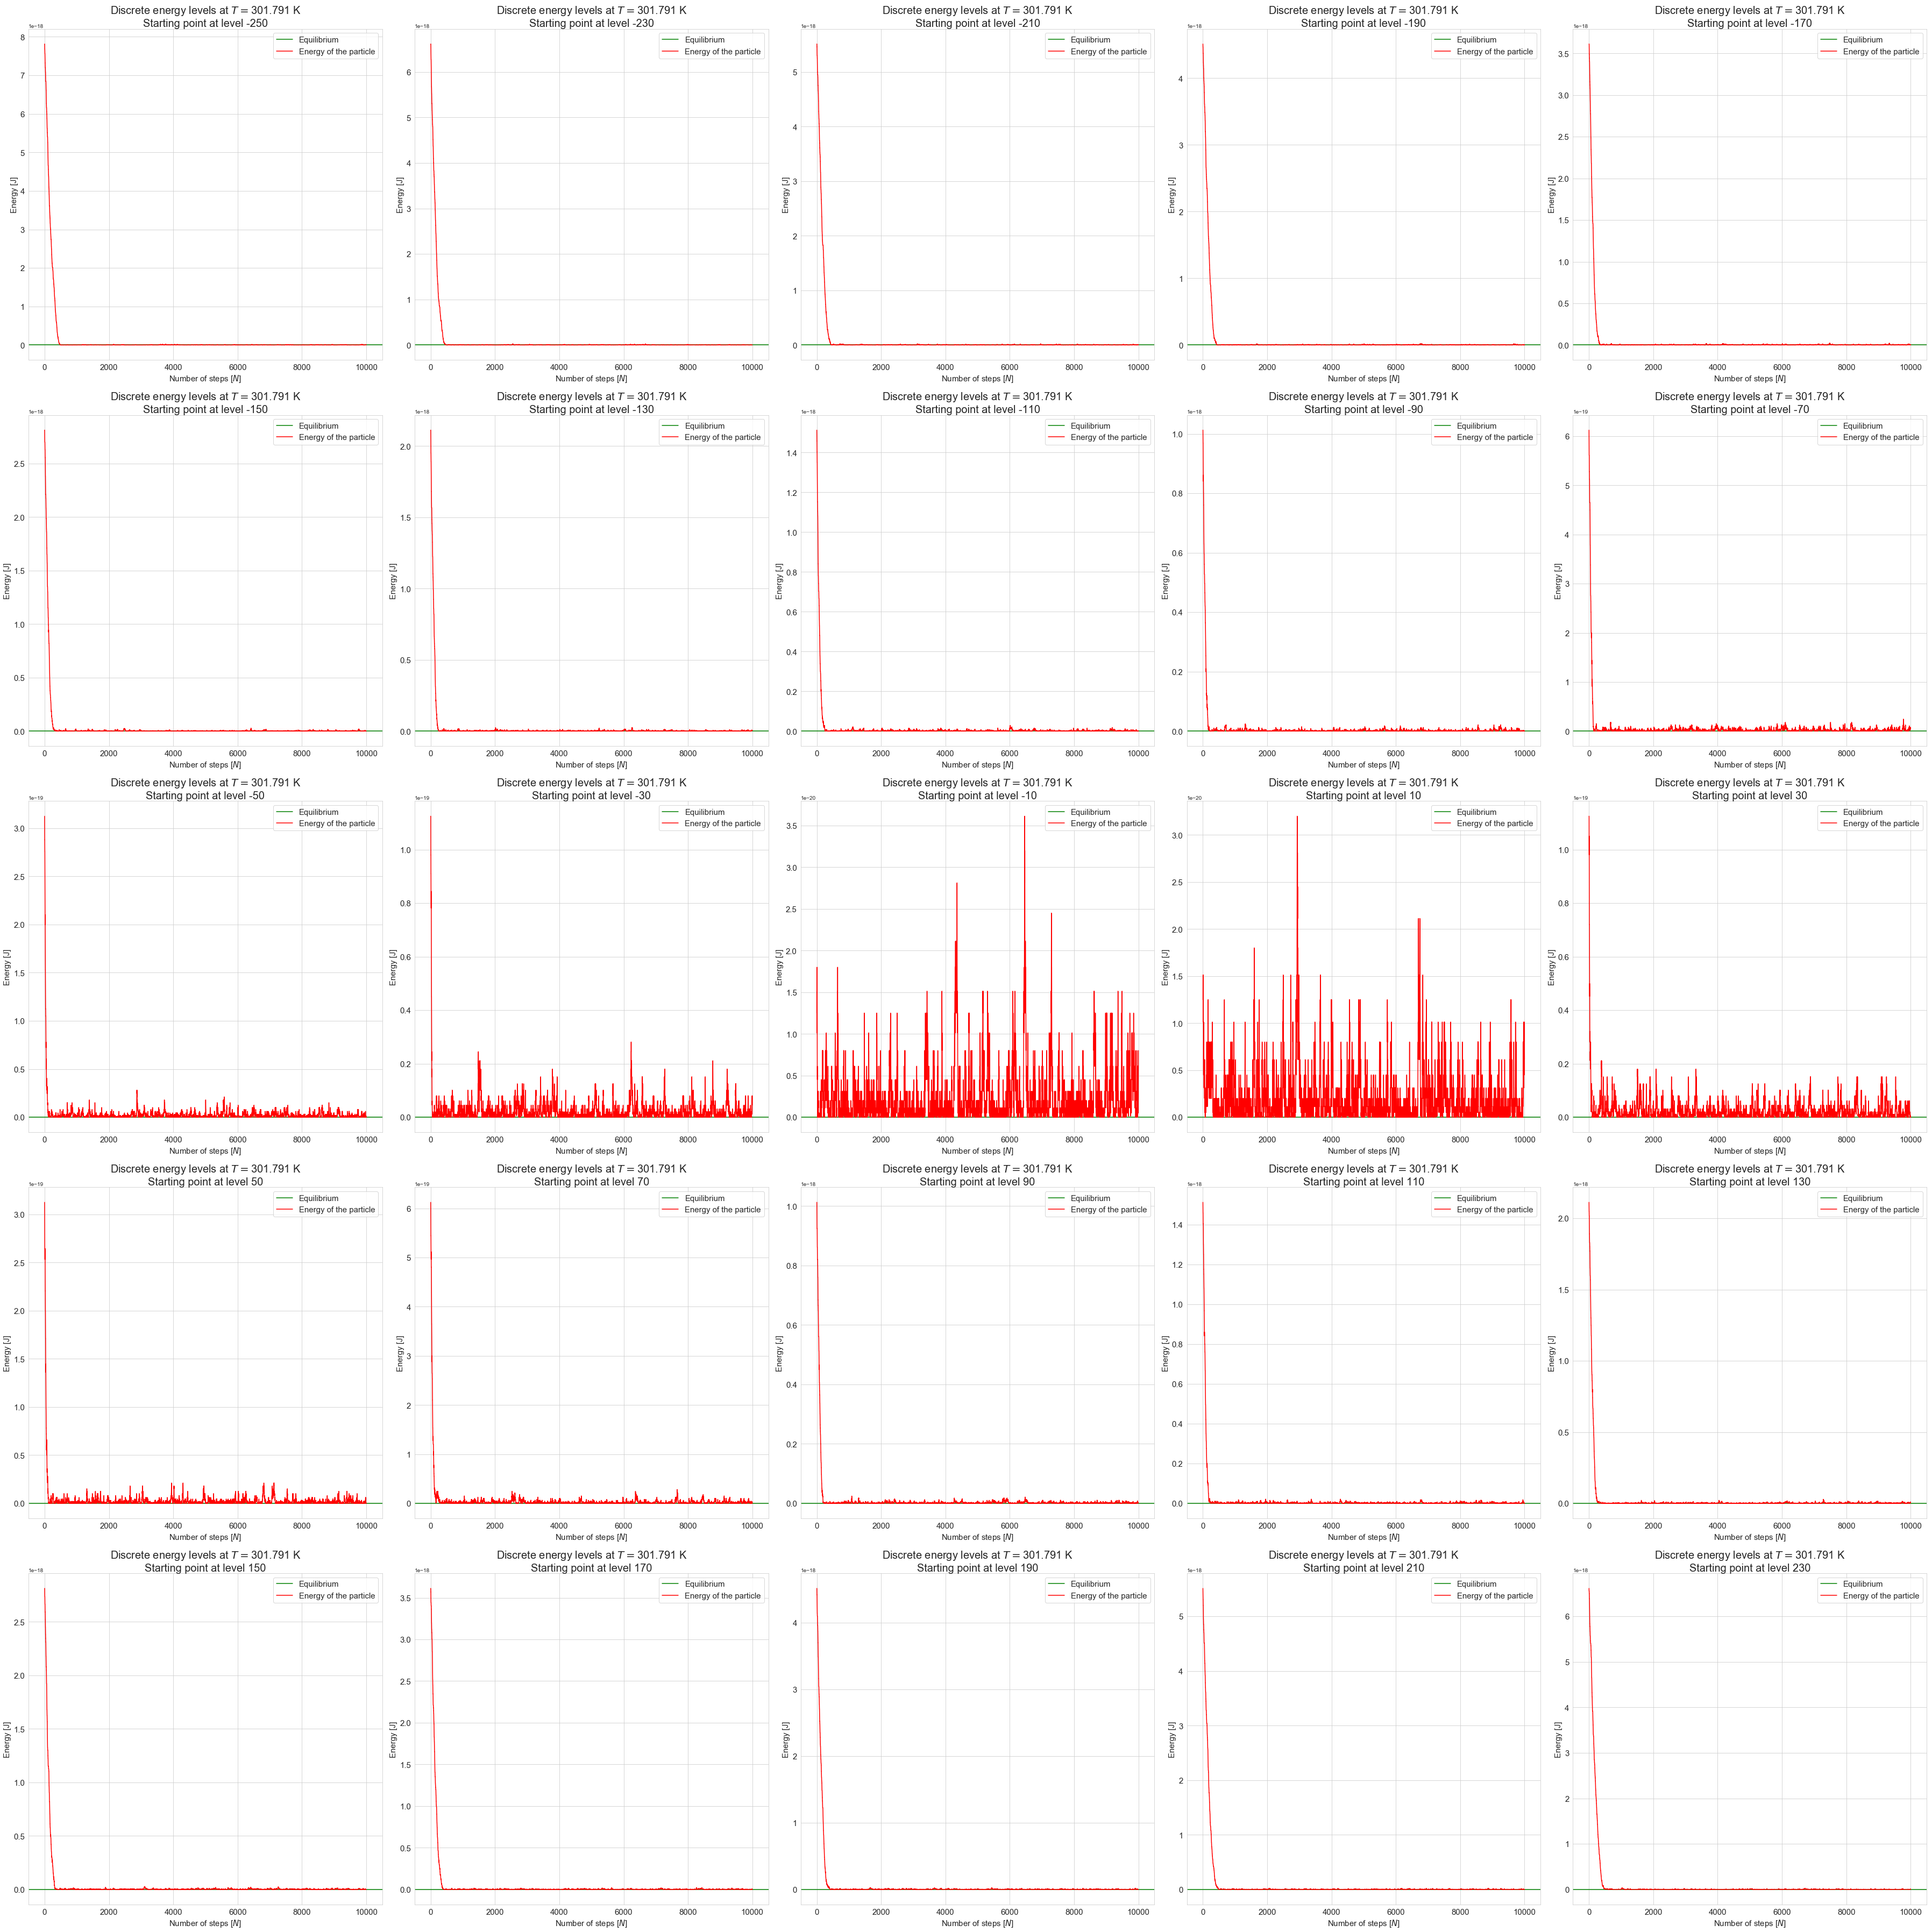

In [585]:
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(50,50))

titlesize=20
axislabelsize=15

for i in range(0,nrows):
    for j in range(0,ncols):
        
        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        axes[i][j].plot(step_indeces, energy_chronology_fixedT[str(i*nrows + j + 1)], c='red', label='Energy of the particle')

        axes[i][j].set_title('Discrete energy levels at $T =${0:.3f} K\nStarting point at level {1}'.format(1 / (choosen_beta * k_B),
                                                                                                                       -250 + (i*nrows + j) * 20),
                             fontsize=titlesize)

        axes[i][j].set_xlabel('Number of steps [$N$]', fontsize=axislabelsize)
        axes[i][j].set_ylabel('Energy [J]', fontsize=axislabelsize)

        axes[i][j].tick_params(axis='both', which='major', labelsize=15)
        axes[i][j].yaxis.get_offset_text().set_fontsize(10)

        axes[i][j].legend(fontsize=15)

fig.tight_layout()
plt.show()

## Examine $\left< x \right>$ and $\left< x^{2} \right>$ expected values

In [559]:
steps = 10000
start = -250
runs = 25

# Dicts for storing the energy levels' indeces and actual energies for various betas
energy_levels_chronology_expected = {}
energy_chronology_expected = {}

# Run the simulation
for j in range(0,len(betas)):
    for i in range(0,runs):
        (energy_levels_chronology_expected[str(j*runs + i + 1)],
        energy_chronology_expected[str(j*runs + i + 1)]) = simulation_step(beta=betas[str(j+1)],
                                                                                start=start,
                                                                                steps=steps)

# Storages for mean data of x and x^2 values for various T temperatures
# These dictionaries store means for every runs, for every T temperature (len == runs * len(betas))
temp_means_levels_expected = {}
temp_means_levels_expected_squared = {}
temp_means_energy_expected = {}
temp_means_energy_expected_squared = {}
# Calculate means of x and x^2 displacements
for j in range(0,len(betas)*runs):
    temp_means_levels_expected[str(j+1)] = np.asarray([np.mean(energy_levels_chronology_expected[str(j+1)][:(i+1)]) for i in range(0, steps+1)])
    temp_means_levels_expected_squared[str(j+1)] = np.asarray([np.mean((energy_levels_chronology_expected[str(j+1)][:(i+1)])**2) for i in range(0, steps+1)])

    temp_means_energy_expected[str(j+1)] = np.asarray([np.mean(energy_chronology_expected[str(j+1)][:(i+1)]) for i in range(0, steps+1)])
    temp_means_energy_expected_squared[str(j+1)] = np.asarray([np.mean((energy_chronology_expected[str(j+1)][:(i+1)])**2) for i in range(0, steps+1)])

# Storages for means of the above data
# These dictionaries stores the mean of N runs for various T temperature (len == len(betas))
means_levels_expected = {}
means_levels_expected_squared = {}
means_energy_expected = {}
means_energy_expected_squared = {}
# Temporary storages for means of each previous runs, when iterating throug them
temp_mean_levels = np.zeros((len(temp_means_levels_expected['1'])))
temp_mean_levels_squared = np.zeros((len(temp_means_levels_expected_squared['1'])))
temp_mean_energy = np.zeros((len(temp_means_energy_expected['1'])))
temp_mean_energy_squared = np.zeros((len(temp_means_energy_expected_squared['1'])))
# Calculate overall means for each betas (or temperatures)
for i in range(0,len(betas)):
    for j in range(0,runs):
        temp_mean_levels += temp_means_levels_expected[str(i*runs + j + 1)]
        temp_mean_levels_squared += temp_means_levels_expected_squared[str(i*runs + j + 1)]
        temp_mean_energy += temp_means_energy_expected[str(i*runs + j + 1)]
        temp_mean_energy_squared += temp_means_energy_expected_squared[str(i*runs + j + 1)]

    means_levels_expected[str(i+1)] = temp_mean_levels/runs
    means_levels_expected_squared[str(i+1)] = temp_mean_levels_squared/runs
    means_energy_expected[str(i+1)] = temp_mean_energy/runs
    means_energy_expected_squared[str(i+1)] = temp_mean_energy_squared/runs
    
    # Reset the temporary arrays for the next beta (or temperature)
    temp_mean_levels = np.zeros((len(temp_means_levels_expected['1'])))
    temp_mean_levels_squared = np.zeros((len(temp_means_levels_expected_squared['1'])))
    temp_mean_energy = np.zeros((len(temp_means_energy_expected['1'])))
    temp_mean_energy_squared = np.zeros((len(temp_means_energy_expected_squared['1'])))
        
step_indeces = np.asarray([i for i in range(0,steps+1)])

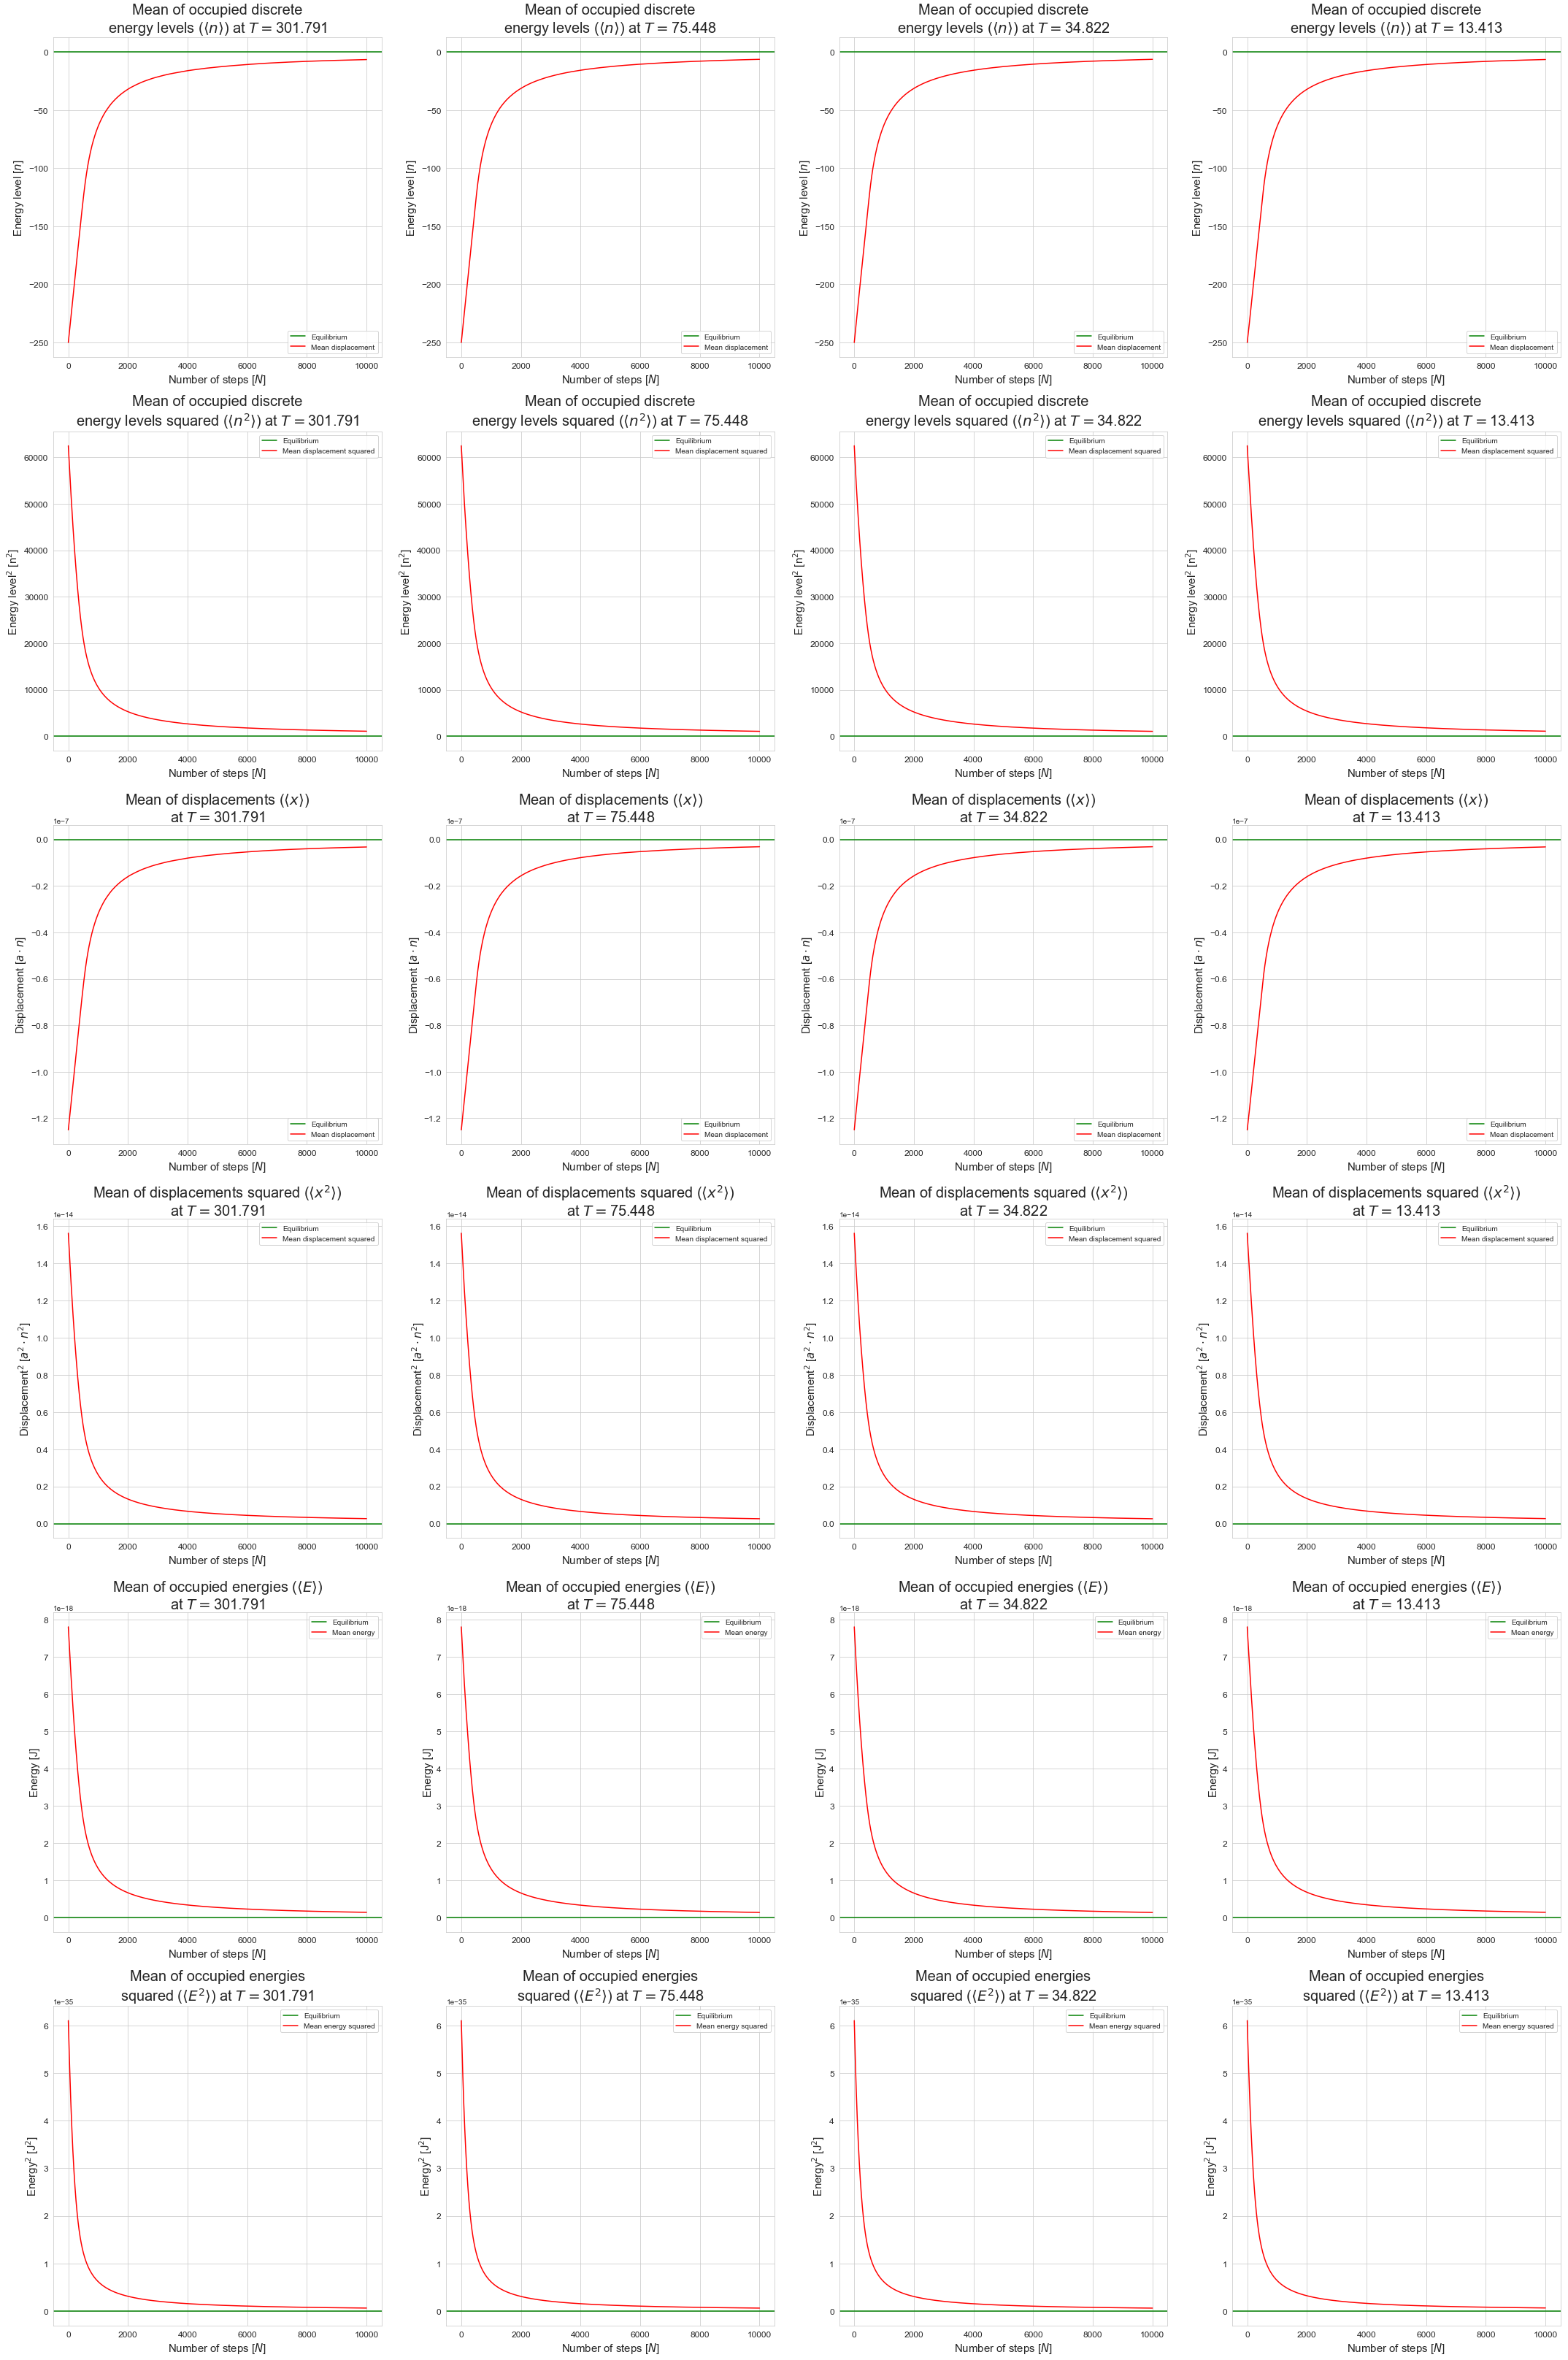

In [616]:
nrows = 6
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,45))

titlesize = 20
axislabelsize = 15

# Initialize graphs with equilibrium line and axis subtitles
for i in range(0,nrows):
    for j in range(0,ncols):
        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        
        axes[i][j].set_xlabel('Number of steps [$N$]', fontsize=axislabelsize)
        
        axes[i][j].tick_params(axis='both', which='major', labelsize=12)
        axes[i][j].yaxis.get_offset_text().set_fontsize(10)

# Mean of occupied discrete energy levels (this is the <n> expected value for displacement)
for j in range(0,4):
    axes[0][j].plot(step_indeces, means_levels_expected[str(j+1)],
                    c='red', label='Mean displacement')
    axes[0][j].set_title('Mean of occupied discrete\nenergy levels ($\\left< n \\right>$) at $T = ${0:.3f}'.format(1 / (betas[str(j+1)] * k_B)),
                         fontsize=titlesize)

    axes[0][j].set_ylabel('Energy level [$n$]', fontsize=axislabelsize)

# Mean of occupied discrete energy levels squared (this is the <n^2> expected value for displacement squared)
for j in range(0,4):
    axes[1][j].plot(step_indeces, means_levels_expected_squared[str(j+1)],
                      c='red', label='Mean displacement squared')

    axes[1][j].set_title('Mean of occupied discrete\nenergy levels squared ($\\left< n^2 \\right>$) at $T = ${0:.3f}'.format(1 / (betas[str(j+1)] * k_B)),
                           fontsize=titlesize)

    axes[1][j].set_ylabel('Energy level$^{2}$ [n$^{2}$]', fontsize=axislabelsize)


# Mean of occupied discrete energy levels (this is the <x> expected value for displacement)
for j in range(0,4):
    axes[2][j].plot(step_indeces, means_levels_expected[str(j+1)] * a,
                    c='red', label='Mean displacement')
    axes[2][j].set_title('Mean of displacements ($\\left< x \\right>$)\nat $T = ${0:.3f}'.format(1 / (betas[str(j+1)] * k_B)),
                         fontsize=titlesize)

    axes[2][j].set_ylabel('Displacement [$a \\cdot n$]', fontsize=axislabelsize)

# Mean of occupied discrete energy levels squared (this is the <x^2> expected value for displacement squared)
for j in range(0,4):
    axes[3][j].plot(step_indeces, means_levels_expected_squared[str(j+1)] * a**2,
                      c='red', label='Mean displacement squared')

    axes[3][j].set_title('Mean of displacements squared ($\\left< x^2 \\right>$)\nat $T = ${0:.3f}'.format(1 / (betas[str(j+1)] * k_B)),
                           fontsize=titlesize)

    axes[3][j].set_ylabel('Displacement$^{2}$ [$a^{2} \\cdot n^{2}$]', fontsize=axislabelsize)


# Mean of actual occupied energies
for j in range(0,4):
    axes[4][j].plot(step_indeces, means_energy_expected[str(j+1)],
                      c='red', label='Mean energy')

    axes[4][j].set_title('Mean of occupied energies ($\\left< E \\right>$)\nat $T = ${0:.3f}'.format(1 / (betas[str(j+1)] * k_B)),
                           fontsize=titlesize)

    axes[4][j].set_ylabel('Energy [J]', fontsize=axislabelsize)

# Mean of actual occupied energies squared
for j in range(0,4):
    axes[5][j].plot(step_indeces, means_energy_expected_squared[str(j+1)],
                      c='red', label='Mean energy squared')

    axes[5][j].set_title('Mean of occupied energies\nsquared ($\\left< E^2 \\right>$) at $T = ${0:.3f}'.format(1 / (betas[str(j+1)] * k_B)),
                           fontsize=titlesize)

    axes[5][j].set_ylabel('Energy$^{2}$ [J$^{2}$]', fontsize=axislabelsize)

# Add legends on graphs
for i in range(0,nrows):
    for j in range(0,ncols):
        axes[i][j].legend(fontsize=10)
        
fig.tight_layout()
plt.show()

## Oscillation of $\left< x^{2} \right> - \left< x \right>^{2}$ around equilibrium

We can get $\left< x \right>^{2} = a^{2} \cdot \left< n \right>^{2}$ and similarly $\left< x^{2} \right> = a^{2} \cdot \left< n^{2} \right>$.

In [598]:
oscillation_levels = {}
oscillation_energy = {} 
for i in range(0, len(means_energy_expected)):
    oscillation_levels[str(i+1)] = means_levels_expected_squared[str(i+1)] * a**2 - means_levels_expected[str(i+1)]**2 * a**2
    oscillation_energy[str(i+1)] = means_energy_expected_squared[str(i+1)] - means_energy_expected[str(i+1)]**2

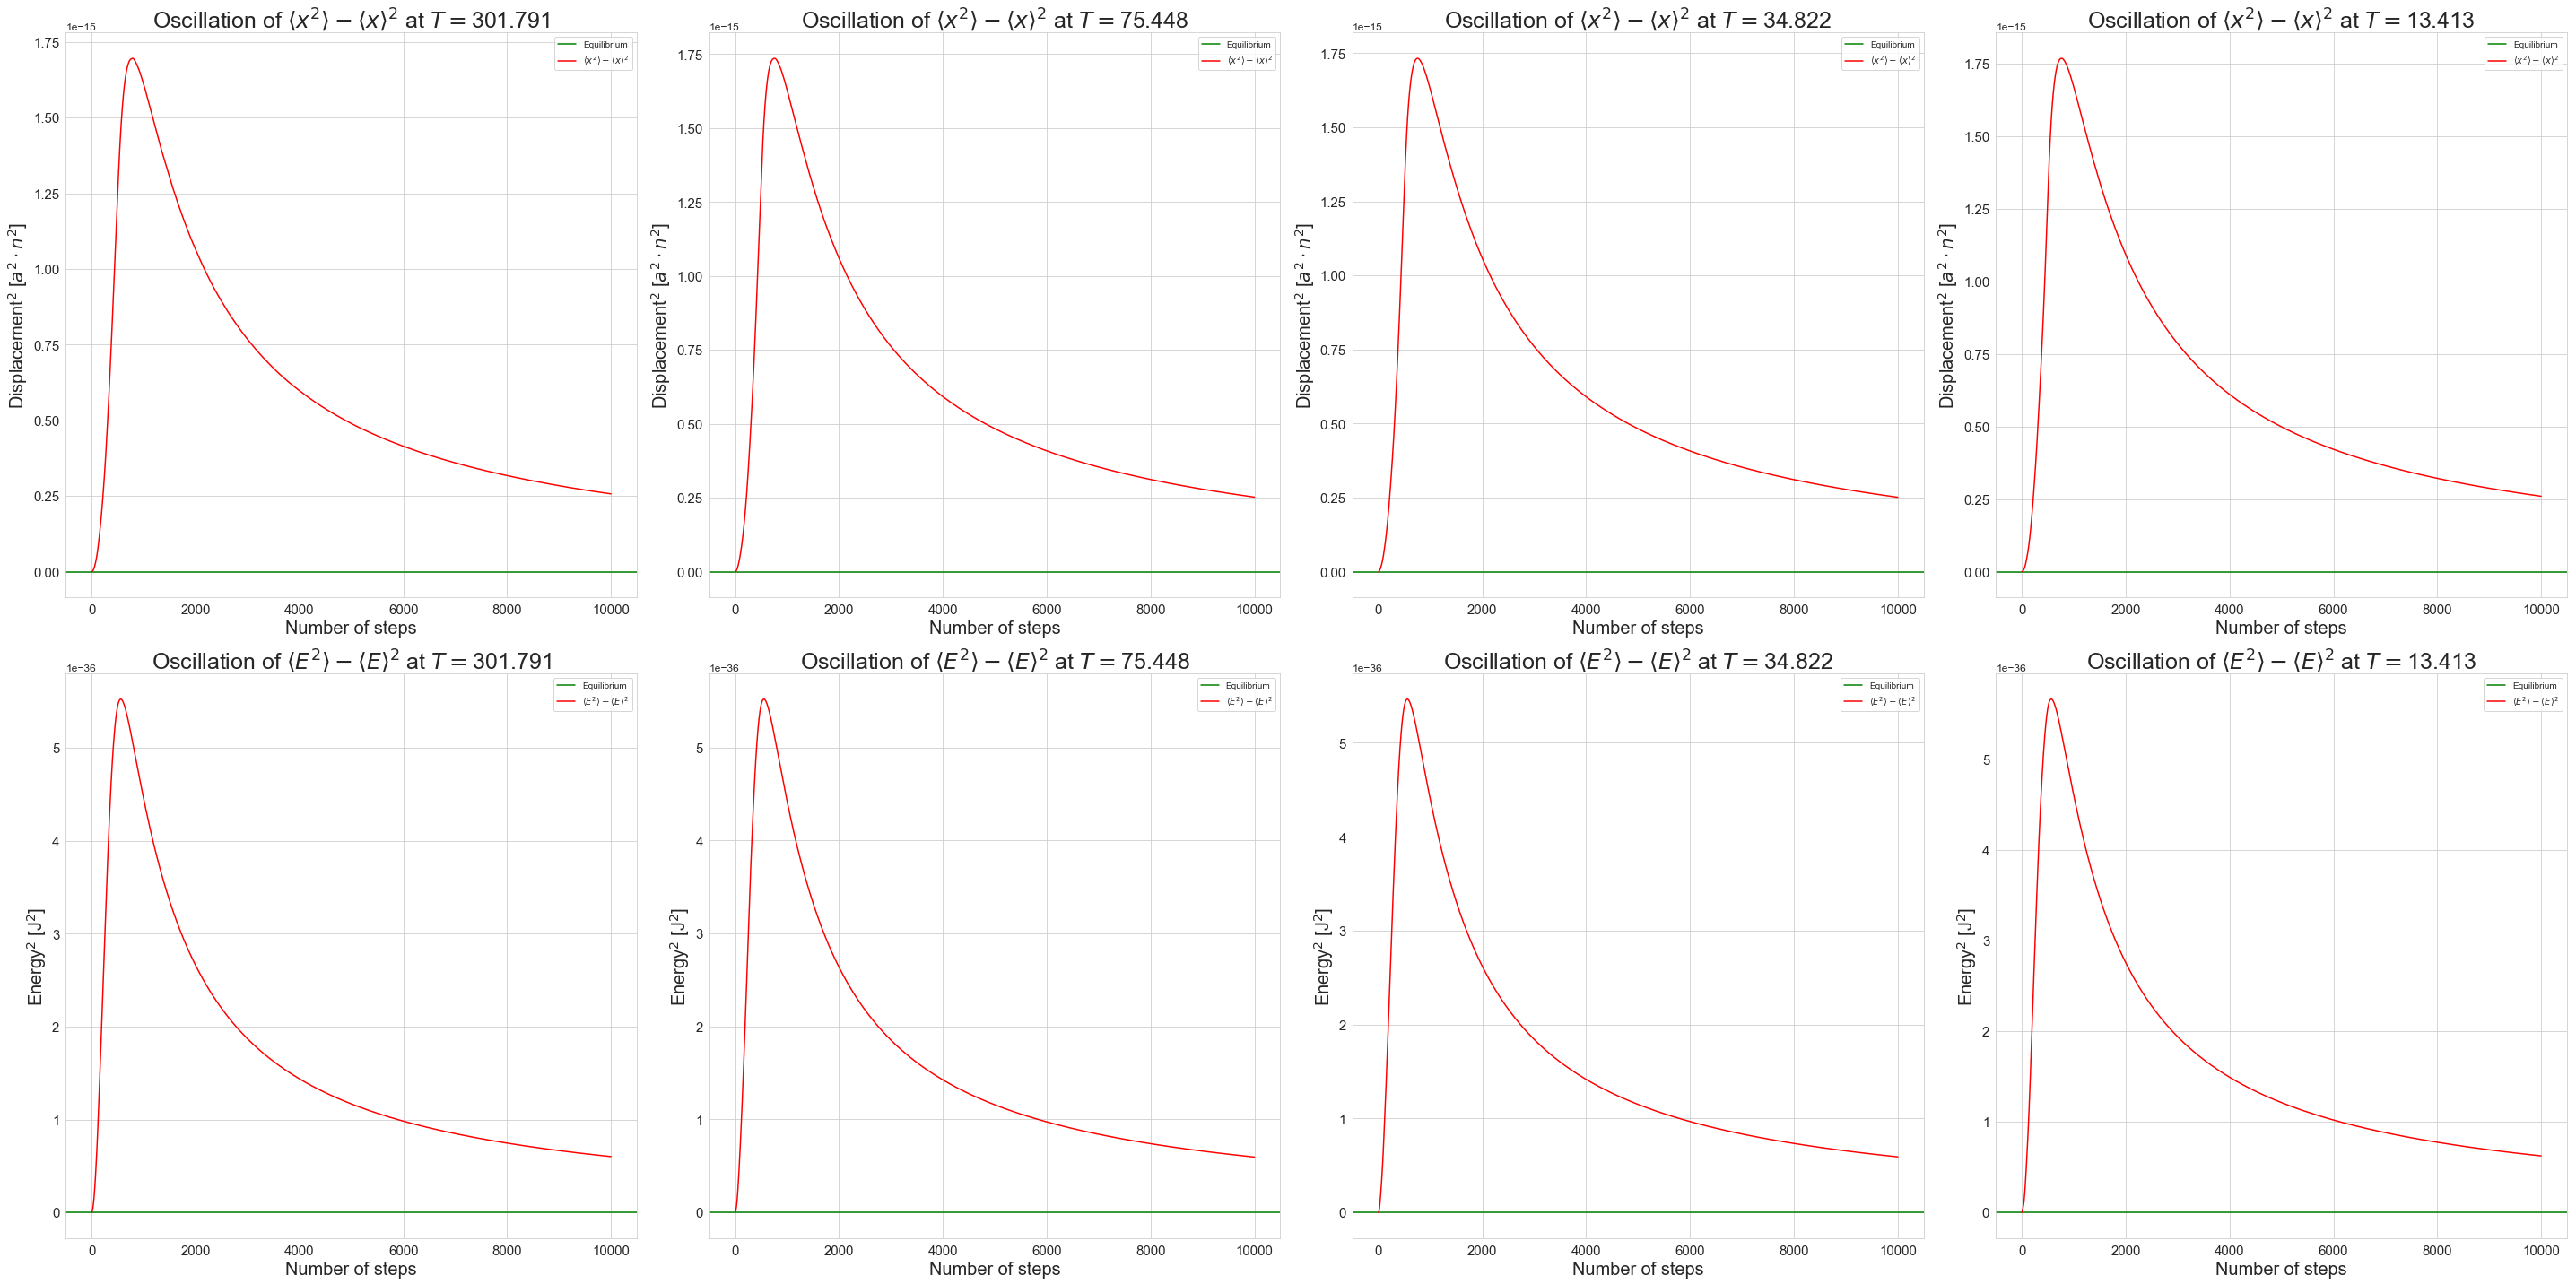

In [617]:
nrows = 2
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40,20))

titlesize = 25
axislabelsize = 20

# Initialize graphs with equilibrium line and axis subtitles
for i in range(0,nrows):
    for j in range(0,ncols):
        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        
        axes[i][j].set_xlabel('Number of steps', fontsize=axislabelsize)
        
        axes[i][j].tick_params(axis='both', which='major', labelsize=15)
        axes[i][j].yaxis.get_offset_text().set_fontsize(12)

# Oscillation of energy levels (this is the <x^2> - <x>^2 expected value)
for j in range(0,4):
    axes[0][j].plot(step_indeces, oscillation_levels[str(j+1)],
                    c='red', label='$\\left< x^{2} \\right> - \\left< x \\right>^{2}$')

    axes[0][j].set_title('Oscillation of $\\left< x^2 \\right> - \\left< x \\right>^2$ at $T = ${0:.3f}'.format(1 / (betas[str(j+1)] * k_B)),
                         fontsize=titlesize)

    axes[0][j].set_ylabel('Displacement$^{2}$ [$a^{2} \\cdot n^{2}$]', fontsize=axislabelsize)

        
# Mean of actual occupied energies (this is the <E^2> - <E>^2 expected value)
for j in range(0,4):
    axes[1][j].plot(step_indeces, oscillation_energy[str(j+1)],
                      c='red', label='$\\left< E^{2} \\right> - \\left< E \\right>^{2}$')

    axes[1][j].set_title('Oscillation of $\\left< E^2 \\right> - \\left< E \\right>^2$ at $T = ${0:.3f}'.format(1 / (betas[str(j+1)] * k_B)),
                           fontsize=titlesize)

    axes[1][j].set_ylabel('Energy$^{2}$ [J$^{2}$]', fontsize=axislabelsize)

# Add legends on graphs
for i in range(0,nrows):
    for j in range(0,ncols):
        axes[i][j].legend(fontsize=10)
        
fig.tight_layout()
plt.show()

## Discussion

After a long time, $\left< x^{2} \right> - \left< x \right>^{2}$ converges to zero. The curve which describes the relaxation process of the system - after it passed $\tau$ relaxation time during propagation - follows an $e^{-f \left( z \right)}$ function, where $f \left( z \right) \equiv f \left( \beta, \Delta E \right)$.